# Spectral Features

Spectral features are a set of audio features that are derived from the spectral representation of an audio signal. The spectral representation of an audio signal is obtained by applying the Fourier transform to the signal over short time windows. This results in a time-varying representation of the signal in the frequency domain, where the power spectral density of the signal at different frequencies and time points is computed.

The time-varying representation of the signal in the frequency domain means that the signal is analyzed over time at different frequencies. When an audio signal is transformed into the frequency domain using the Fourier transform, it becomes possible to see how much of the signal's energy is present at each frequency component.

In this time-varying representation, the power spectral density of the signal is computed for different frequencies and time points. Power spectral density refers to the distribution of the signal's power across different frequencies. So, for each small time window, the power spectral density is computed for each frequency, resulting in a time-varying representation of the signal in the frequency domain.

This representation allows for the extraction of various spectral features, which can be used to characterize different properties of the audio signal. By analyzing the spectral features over time, it is possible to gain insights into how the frequency content of the signal changes over time and how different events in the audio signal are related to changes in the spectral content.

In [21]:
import librosa
import librosa.feature

import numpy as np

import matplotlib.pyplot as plt

In [22]:
def load_audio(audio_path):
    x, sr = librosa.load(audio_path)
    print(type(x), type(sr))
    print(x.shape, sr)

    return x, sr

In [23]:
base_path = './Data/genres_original'
file = 'reggae/reggae.00005.wav'
audio_path = f'{base_path}/{file}'
(y, sr) = load_audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


## Chroma_stft

A feature that represents the distribution of pitch classes in an audio signal. It is computed from the short-time Fourier transform (STFT) and can be used for tasks such as music genre classification and chord recognition.

In [24]:
librosa.feature.chroma_stft(y=y, sr=sr)

array([[0.35166004, 0.28422588, 0.24786304, ..., 0.5592603 , 0.37255338,
        0.78601134],
       [0.688377  , 0.8210777 , 1.        , ..., 0.5851438 , 0.30033076,
        0.64760494],
       [1.        , 1.        , 0.8437313 , ..., 0.7478237 , 0.47217178,
        0.7563511 ],
       ...,
       [0.8913222 , 0.58592093, 0.39343765, ..., 0.30214497, 0.2695208 ,
        0.492628  ],
       [0.84476644, 0.49521217, 0.36946237, ..., 0.29371986, 0.19176272,
        0.3627578 ],
       [0.2942005 , 0.19752395, 0.17520203, ..., 0.38606405, 0.20034434,
        0.47595617]], dtype=float32)

### Use an energy (magnitude) spectrum instead of power spectrogram

Using an energy (magnitude) spectrum instead of a power spectrogram means that instead of computing the power spectral density of the signal, the magnitude of the Short-Time Fourier Transform (STFT) is used.

The STFT of an audio signal is obtained by computing the Fourier transform of short time windows of the signal. The resulting STFT consists of a time-varying complex-valued matrix whose magnitude is commonly used to represent the energy of the signal at each frequency and time point.

In the following code snippet, the STFT of the audio signal 'y' is first computed using the librosa.stft() function, and the magnitude of the STFT is obtained using np.abs() function. Then, the chroma feature is computed from the magnitude spectrogram using the librosa.feature.chroma_stft() function.

The chroma feature is a type of spectral feature that represents the pitch content of the audio signal. It is computed by mapping the STFT magnitude to a chromatic scale, which groups nearby frequencies into semitone bins. The resulting chroma feature is a time-varying matrix whose columns represent different pitch classes (e.g., C, C#, D, D#, etc.) and whose values represent the energy of the audio signal in each pitch class at each time point.

Using the magnitude spectrogram instead of the power spectrogram can be beneficial in cases where only the relative magnitudes of different frequency components matter, and the exact power levels are less important. This approach can be particularly useful in music information retrieval tasks such as genre classification, chord recognition, and melody extraction.

In [25]:
S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.53401726, 0.44683033, 0.4762849 , ..., 1.        , 0.96944803,
        1.        ],
       [0.81095344, 0.8673055 , 1.        , ..., 0.82923687, 0.66784894,
        0.730963  ],
       [0.8939466 , 1.        , 0.98646885, ..., 0.7671196 , 0.74128073,
        0.69876546],
       ...,
       [0.9064403 , 0.7782171 , 0.7482533 , ..., 0.79530054, 0.6618843 ,
        0.7130978 ],
       [1.        , 0.85159045, 0.8512415 , ..., 0.81082565, 0.5449006 ,
        0.61104953],
       [0.600064  , 0.48774683, 0.48289582, ..., 0.90396106, 0.61699885,
        0.68860346]], dtype=float32)

Use a pre-computed power spectrogram with a larger frame

In [26]:
S = np.abs(librosa.stft(y, n_fft=4096))**2
chroma = librosa.feature.chroma_stft(S=S, sr=sr)
chroma

array([[0.3437655 , 0.29820922, 0.25112718, ..., 0.5173068 , 0.52142656,
        0.43685916],
       [0.86834407, 1.        , 1.        , ..., 0.708154  , 0.5378942 ,
        0.19122979],
       [1.        , 0.83408046, 0.62090695, ..., 0.83584964, 0.6369374 ,
        0.31624207],
       ...,
       [0.6932554 , 0.35709026, 0.07001977, ..., 0.47259486, 0.3459339 ,
        0.24859168],
       [0.5847085 , 0.3518466 , 0.18775363, ..., 0.35956472, 0.2758803 ,
        0.23984511],
       [0.21126698, 0.16427538, 0.14277802, ..., 0.39302167, 0.3452336 ,
        0.30430454]], dtype=float32)

### Plot Chroma_stft

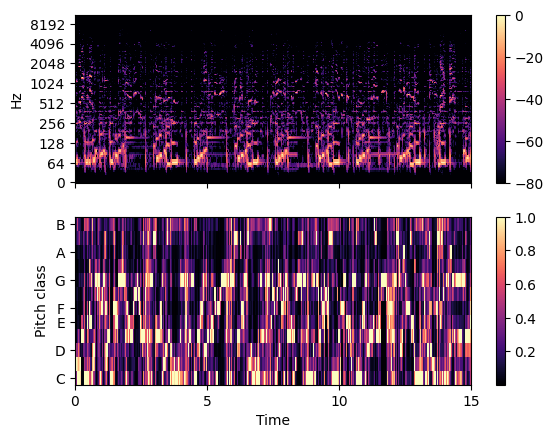

In [27]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax=ax[0]
)
fig.colorbar(img, ax=[ax[0]])

ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time',ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

## Chroma_cqt

Similar to chroma_stft, but computed using the constant-Q transform (CQT). It is more robust to tuning variations and can be used for music transcription.

In [28]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=4096)
chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)

### Constant-Q Transform (CQT) vs Short-Time Fourier Transform (STFT)

The Constant-Q Transform (CQT) and Short-Time Fourier Transform (STFT) are both time-frequency analysis techniques commonly used in audio signal processing. While they share some similarities, they also have distinct characteristics that make them suitable for different applications. Let's delve deeper into the differences between CQT and STFT and discuss when to use each one:

#### Frequency Resolution:

**STFT**: The STFT provides a fixed frequency resolution throughout the entire spectrum. It divides the signal into overlapping frames and computes the Fourier Transform on each frame. As a result, the frequency resolution is constant across the entire frequency range.
**CQT**: The CQT offers a logarithmically spaced frequency resolution. It achieves this by dividing the signal into frames of varying width, with narrower frames at higher frequencies and wider frames at lower frequencies. This logarithmic spacing provides a more perceptually accurate representation of pitch perception and better aligns with the human auditory system.

#### Time-Frequency Trade-off:

*STFT*: The STFT provides good temporal resolution, meaning it can capture rapid changes in the signal over time. However, its frequency resolution is limited, especially for low frequencies. This trade-off makes the STFT well-suited for analyzing transient events or detecting short-term spectral changes.
*CQT*: The CQT sacrifices some temporal resolution to achieve better frequency resolution, particularly in the low-frequency range. It is suitable for tasks that require more accurate pitch estimation and harmonic analysis, where the temporal details are less important than the spectral characteristics.
Musical Pitch Analysis:

*STFT*: The STFT is often used for tasks that involve analyzing and processing audio signals in the context of musical pitch. It can capture the harmonic content of the signal, but its fixed frequency resolution may result in less accurate pitch estimation, especially for complex musical signals.
*CQT*: The CQT is particularly useful for tasks that require precise pitch analysis, such as melody extraction, chord recognition, or pitch tracking. Its logarithmic frequency resolution better aligns with the musical pitch scale, allowing for more accurate estimation of pitch and harmonic relationships.

#### Spectrogram Visualization:

STFT: The STFT spectrogram is commonly used for visualizing the spectral content of audio signals over time. It provides a straightforward representation where each pixel represents the magnitude of a specific frequency component at a particular time.
CQT: The CQT spectrogram offers a logarithmic frequency axis, which can be useful for visualizing pitch-related features. It can reveal the harmonic structure and tonal characteristics of the signal more intuitively than the linearly spaced frequency axis of the STFT spectrogram.

In summary, the choice between CQT and STFT depends on the specific application and the trade-off between temporal and frequency resolution. If accurate pitch analysis and harmonic information are crucial, the CQT is generally preferred. On the other hand, if capturing rapid temporal changes or processing transient events is the main objective, the STFT is a suitable choice.

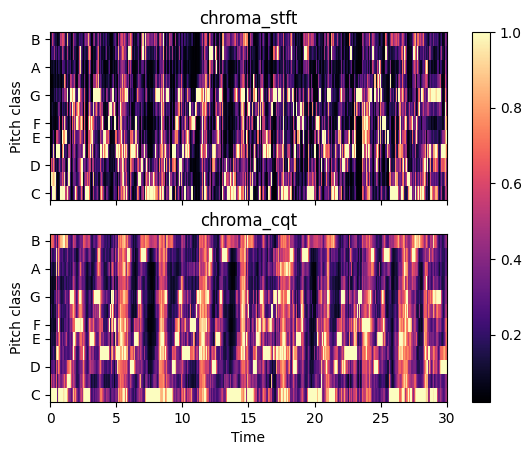

In [29]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cqt, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

## Chroma_cens

A variant of chroma_stft that is computed using a constant energy normalization scheme (CENS). It is more robust to variations in tempo and dynamics and can be used for music recommendation and retrieval.

## Chroma_vqt

A variant of chroma_cqt that is computed using a variable-Q transform (VQT). It is more suitable for analyzing non-stationary signals, such as speech and environmental sounds.

## Melspectrogram

A feature that represents the power spectral density of an audio signal in the mel-scale. It is computed using a bank of mel filters and can be used for speech recognition, speaker identification, and music genre classification.

## MFCC

Mel-frequency cepstral coefficients are a feature that represents the spectral envelope of an audio signal. They are computed by taking the logarithm of the mel-spectrum and applying a discrete cosine transform (DCT). They are commonly used for speech recognition and speaker identification.

## RMS

Root mean square is a feature that represents the overall energy of an audio signal. It is computed as the square root of the average of the squared amplitude values and can be used for audio level normalization and loudness measurement.

## Spectral_centroid

A feature that represents the center of mass of the spectral distribution of an audio signal. It is computed as the weighted mean of the frequency values and can be used for timbre analysis and music genre classification.

## Spectral_bandwidth

A feature that represents the width of the spectral distribution of an audio signal. It is computed as the second central moment of the frequency values and can be used for timbre analysis and music genre classification.

## Spectral_contrast

A feature that represents the difference in energy between adjacent frequency bands of an audio signal. It is computed by dividing the spectrum into sub-bands and computing the difference between the maximum and minimum energy values in each band. It can be used for music genre classification and speech recognition.

## Spectral_flatness

A feature that represents the tonality of an audio signal. It is computed as the ratio between the geometric mean and the arithmetic mean of the power spectral density and can be used for music genre classification and instrument recognition.

## Spectral_rolloff

A feature that represents the frequency below which a certain percentage of the spectral energy of an audio signal is contained. It is computed as the frequency at which the cumulative sum of the spectral energy reaches a certain threshold and can be used for speech recognition and music genre classification.

## Poly_features

A feature that represents the coefficients of a polynomial fit to the magnitude spectrum of an audio signal. It is computed using linear regression and can be used for speech recognition and music genre classification.

## Tonnetz

A feature that represents the harmonic relationships between pitch classes in an audio signal. It is computed using a graph-based representation and can be used for music analysis and chord recognition.